In [2]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Needed specifically for colorbar plotting
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
#Get info
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [6]:
#Get Columns
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d',
                                                                    'price_change_percentage_14d', 'price_change_percentage_30d',
                                                                    'price_change_percentage_60d', 'price_change_percentage_200d',
                                                                    'price_change_percentage_1y']])

In [9]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns = ['price_change_percentage_24h', 'price_change_percentage_7d',
                                                                    'price_change_percentage_14d', 'price_change_percentage_30d',
                                                                    'price_change_percentage_60d', 'price_change_percentage_200d',
                                                                    'price_change_percentage_1y'])

# Copy the crypto names from the original data
market_data_scaled_df['coin_id'] = market_data_df.index

# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index('coin_id')

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [11]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = range(1,11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    kmodel = KMeans(n_clusters=i, n_init='auto', random_state=1)
    kmodel.fit(market_data_scaled_df)
    inertia.append(kmodel.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_data_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


<Axes: title={'center': 'Elbow Curve'}, xlabel='k', ylabel='inertia'>

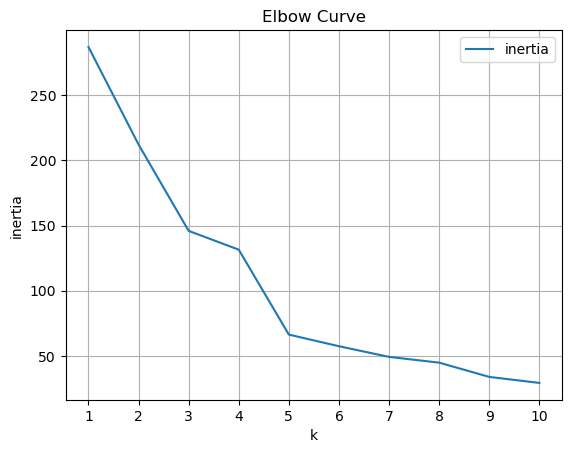

In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_df.plot.line(x='k', y='inertia', ylabel='inertia', xticks=k, title='Elbow Curve', grid=True)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for `k` is either 3 or 5. However since 5 is most visibly the last bend in the curve before the following gradually fades out, it is chosen as the optimal value. We can use SciKit's metric system to determine performance further.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [15]:
# Initialize the K-Means model using the best value for k
kmodel5 = KMeans(n_clusters=5, n_init='auto', random_state=1)

In [16]:
# Fit the K-Means model using the scaled data
kmodel5.fit(market_data_scaled_df)

KMeans(n_clusters=5, n_init='auto', random_state=1)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmodel5_segments = kmodel5.predict(market_data_scaled_df)

# View the resulting array of cluster values.
print(kmodel5_segments)

[1 1 2 2 1 1 1 1 1 2 0 2 2 1 2 2 2 2 1 2 0 1 2 2 2 2 2 0 1 2 2 2 3 2 0 0 4
 0 2 2 0]


In [18]:
# Create a copy of the DataFrame
market_scaled_predictions_km = market_data_scaled_df.copy()

In [19]:
# Add a new column to the DataFrame with the predicted clusters
market_scaled_predictions_km['crypto_cluster'] = kmodel5_segments

# Display sample data
market_scaled_predictions_km.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


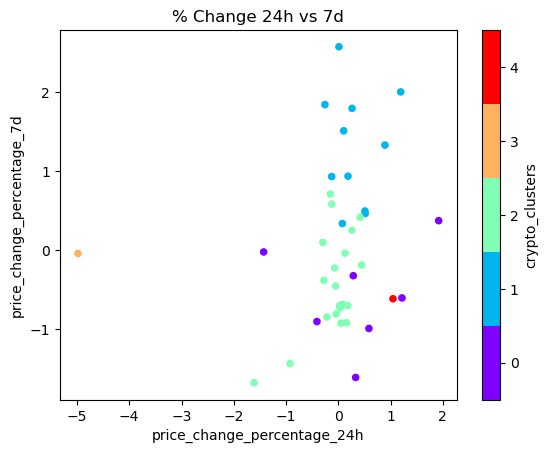

In [20]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

# Plotting the scatter plot
scatter = market_scaled_predictions_km.plot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='crypto_cluster', 
    colormap='rainbow',
    colorbar=False,
    title='% Change 24h vs 7d'
)

# Number of clusters
num_clusters = 5
#List of classes for the colorbar
classes = [0, 1, 2, 3, 4]

# Adding a color bar
cbar = plt.colorbar(scatter.collections[0], boundaries=np.arange(num_clusters + 1) - 0.5)
cbar.set_ticks(np.arange(num_clusters))
cbar.set_ticklabels(classes)
cbar.set_label('crypto_clusters')

# Display the plot
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [22]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [23]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca_data = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
market_pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [24]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [25]:
print(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2])

0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is the sum of the variance ratio of each of the components which in this case is 0.8950316570309842.

In [27]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_pca_df = pd.DataFrame(market_pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
market_pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
market_pca_df = market_pca_df.set_index('coin_id')

# Display sample data
market_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [29]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = range(1,11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    kmodel = KMeans(n_clusters=i, n_init='auto', random_state=1)
    kmodel.fit(market_pca_df)
    inertia.append(kmodel.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_data_df

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217
5,6,27.961695
6,7,24.462735
7,8,19.451747
8,9,13.755814
9,10,13.119661


<Axes: title={'center': 'Elbow Curve'}, xlabel='k', ylabel='inertia'>

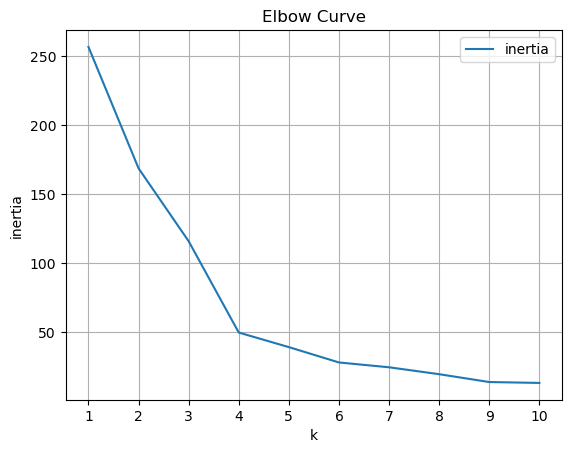

In [30]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_df.plot.line(x='k', y='inertia', ylabel='inertia', xticks=k, title='Elbow Curve', grid=True)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value is 4 from the very obvious elbow bend in the line plot.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the difference is that in the original data it was a grey area to choose from around the PCA optimal data, i.e, the original data used either 3 or 5. But the PCA uses a sharp 4. Indicating the clear performance difference in terms of optimality.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [33]:
# Initialize the K-Means model using the best value for k
kmodel_pca = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [34]:
# Fit the K-Means model using the PCA data
kmodel_pca.fit(market_pca_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [35]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_segments = kmodel_pca.predict(market_pca_df)

# Print the resulting array of cluster values.
print(pca_segments)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [36]:
# Create a copy of the DataFrame with the PCA data
market_scaled_predictions_pca = market_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_scaled_predictions_pca['crypto_cluster'] = pca_segments

# Display sample data
market_scaled_predictions_pca.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [37]:
#Checking all the clusters counts.
market_scaled_predictions_pca['crypto_cluster'].value_counts()

crypto_cluster
0    26
1    13
2     1
3     1
Name: count, dtype: int64

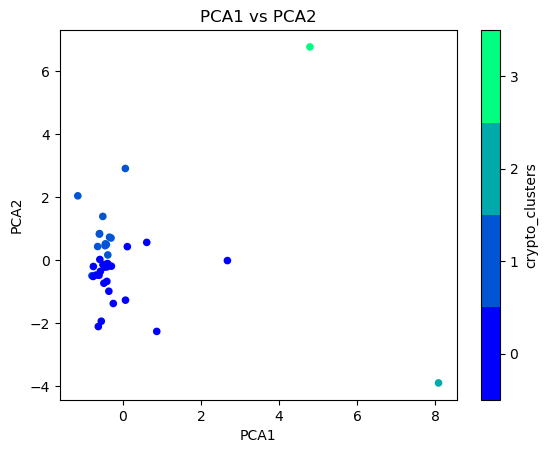

In [38]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_scatter = market_scaled_predictions_pca.plot.scatter(x='PCA1', 
                                                           y='PCA2', 
                                                           c='crypto_cluster', 
                                                           colormap='winter', 
                                                           colorbar=False,
                                                           title='PCA1 vs PCA2')

# Number of clusters for the PCA Data
pca_num_clusters = 4
#Classes for the colorbar for the PCA Data post clustering
pca_classes = [0, 1, 2, 3]

# Adding a color bar
cbar = plt.colorbar(pca_scatter.collections[0], boundaries=np.arange(pca_num_clusters + 1) - 0.5)
cbar.set_ticks(np.arange(pca_num_clusters))
cbar.set_ticklabels(pca_classes)
cbar.set_label('crypto_clusters')

# Display the plot
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [40]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2','PCA3'], index=market_data_scaled_df.columns)
#Displaying the component weights for all the features
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


In [41]:
#Checking the highest and lowest weights for PCA1
pca_component_weights['PCA1'].nlargest(100)

price_change_percentage_200d    0.594468
price_change_percentage_1y      0.568379
price_change_percentage_60d     0.320365
price_change_percentage_30d     0.191523
price_change_percentage_14d    -0.009162
price_change_percentage_7d     -0.102432
price_change_percentage_24h    -0.416728
Name: PCA1, dtype: float64

In [42]:
#Checking the highest and lowest weights for PCA2
pca_component_weights['PCA2'].nlargest(100)

price_change_percentage_30d     0.562182
price_change_percentage_14d     0.540415
price_change_percentage_60d     0.434040
price_change_percentage_24h     0.358162
price_change_percentage_7d      0.227432
price_change_percentage_200d    0.027735
price_change_percentage_1y     -0.150789
Name: PCA2, dtype: float64

In [43]:
#Checking the highest and lowest weights for PCA3
pca_component_weights['PCA3'].nlargest(100)

price_change_percentage_7d      0.787670
price_change_percentage_14d     0.349534
price_change_percentage_1y      0.210541
price_change_percentage_200d    0.039733
price_change_percentage_30d    -0.181744
price_change_percentage_24h    -0.218795
price_change_percentage_60d    -0.361377
Name: PCA3, dtype: float64

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The strongest positive and negative influences for each of the components are:
  1. PCA1 :
     >price_change_percentage_200d$~~~~~$    0.594468 (POSITIVE)\
     >price_change_percentage_24h$~~~~~~$   -0.416728 (NEGATIVE)

  2. PCA2 :
     >price_change_percentage_30d$~~~~~~~$     0.562182 (POSITIVE)\
      >price_change_percentage_1y$~~~~~~~~$     -0.150789 (NEGATIVE)
    
  3. PCA3 
     >price_change_percentage_7d$~~~~~~~~$      0.787670 (POSITIVE)\
     >price_change_percentage_60d$~~~~$    -0.361377 (NEGATIVE)
    